### Limpeza de dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from io import StringIO

In [5]:
emprestimo = pd.read_csv('/content/drive/MyDrive/Alura - dataset/emprestimo.csv')
dados_exemplares = pd.read_csv('/content/drive/MyDrive/Alura - dataset/dados_exemplares.csv')

In [6]:
matricula_alunos = pd.read_csv('/content/drive/MyDrive/Alura - dataset/matricula_alunos.csv')
usuarios = pd.read_csv('/content/drive/MyDrive/Alura - dataset/usuarios.csv')

In [7]:
emprestimo.shape

(2258018, 8)

In [8]:
emprestimo.drop_duplicates().shape

(2258018, 8)

In [9]:
dados_exemplares.shape

(546237, 8)

In [10]:
dados_exemplares.drop_duplicates().shape

(546237, 8)

In [11]:
matricula_alunos.shape


(7726, 4)

In [12]:
matricula_alunos.drop_duplicates().shape


(7726, 4)

In [13]:
usuarios.shape

(62802, 4)

In [14]:
usuarios.drop_duplicates().shape

(62802, 4)

In [15]:
emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   id_emprestimo         int64  
 2   codigo_barras         object 
 3   data_renovacao        object 
 4   data_emprestimo       object 
 5   data_devolucao        object 
 6   matricula_ou_siape    float64
 7   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 137.8+ MB


In [16]:
# removendo coluna desnecessária
emprestimo.drop(columns='Unnamed: 0', inplace=True)

In [17]:
dados_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546237 entries, 0 to 546236
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             546237 non-null  int64 
 1   id_exemplar       546237 non-null  int64 
 2   codigo_barras     546237 non-null  object
 3   colecao           546237 non-null  object
 4   biblioteca        546237 non-null  object
 5   status_material   546237 non-null  object
 6   localizacao       546237 non-null  int64 
 7   registro_sistema  546237 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 33.3+ MB


In [18]:
dados_exemplares.drop(columns='registro_sistema', inplace=True)
dados_exemplares.drop(columns='index', inplace=True)

#### Materiais x Utilização

In [19]:
# unificando todos os dados
emprestimo_exemplares = emprestimo.merge(dados_exemplares, how = 'left')

In [20]:
emprestimo_exemplares.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287963
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape         3171
tipo_vinculo_usuario          0
id_exemplar              189258
colecao                  189258
biblioteca               189258
status_material          189258
localizacao              189258
dtype: int64

In [21]:
emprestimo_exemplares.isnull().query('localizacao == True')

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
23,False,False,False,False,False,False,False,True,True,True,True,True
116,False,False,True,False,False,False,False,True,True,True,True,True
127,False,False,False,False,False,False,False,True,True,True,True,True
136,False,False,False,False,False,False,False,True,True,True,True,True
137,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2261712,False,False,True,False,False,False,False,True,True,True,True,True
2261721,False,False,True,False,False,False,False,True,True,True,True,True
2261737,False,False,False,False,True,False,False,True,True,True,True,True
2261740,False,False,True,False,False,False,False,True,True,True,True,True


In [22]:
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0


In [23]:
emprestimo_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261816 entries, 0 to 2261815
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           float64
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
dtypes: float64(3), int64(1), object(8)
memory usage: 224.3+ MB


##### Criando coluna CDU

In [24]:
emprestimo_exemplares['localizacao'].fillna(value = -1, inplace= True)

In [25]:
CDU_lista = []
for CDU in emprestimo_exemplares['localizacao']:
  if(CDU < 100):
    CDU_lista.append('Generalidades')
  elif(CDU < 200):
    CDU_lista.append('Filosofia e psicologia')
  elif(CDU < 300):
    CDU_lista.append('Religião')
  elif(CDU < 400):
    CDU_lista.append('Ciências sociais')
  elif(CDU < 500):
    CDU_lista.append('Classe vaga')
  elif(CDU < 600):
    CDU_lista.append('Matemática e ciências naturais')
  elif(CDU < 700):
    CDU_lista.append('Ciências aplicadas')
  elif(CDU < 800):
    CDU_lista.append('Belas artes')
  elif(CDU < 900):
    CDU_lista.append('Linguagem')
  else:
    CDU_lista.append('Geografia. Biografia. História.')

emprestimo_exemplares['CDU'] = CDU_lista

In [26]:
emprestimo_exemplares.query('localizacao == 199')

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
27125,736812,2007026015,2010/03/28 11:43:16.903000000,2010/03/15 21:18:03.314000000,2010/04/05 20:11:24.155000000,2.009025e+09,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
40324,750048,2007026015,NaN,2010/04/05 21:15:43.472000000,2010/04/26 20:42:17.053000000,2.011051e+09,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
55566,765301,2007026015,NaN,2010/04/28 18:14:25.834000000,2010/05/13 17:35:14.031000000,2.009025e+09,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
65035,774784,2007026015,NaN,2010/05/13 21:22:02.679000000,2010/05/28 19:06:08.638000000,2.009026e+09,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
74379,784147,2007026015,NaN,2010/05/28 19:32:26.432000000,2010/06/16 20:26:34.000000000,2.009026e+09,ALUNO DE GRADUAÇÃO,99183.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245549,2972855,2014035233,2020/03/06 14:34:24.524000000,2020/02/20 11:25:11.517000000,2020/12/17 08:44:29.000000000,2.017010e+10,ALUNO DE GRADUAÇÃO,1139905.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
2246026,2973330,2014076880,NaN,2020/02/20 16:27:23.427000000,2020/03/04 12:26:21.000000000,2.019001e+10,ALUNO DE GRADUAÇÃO,1169812.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,199.0,Filosofia e psicologia
2248952,2976247,2013088081,NaN,2020/02/28 10:24:05.517000000,2020/03/02 18:37:43.000000000,2.017009e+10,ALUNO DE GRADUAÇÃO,1107026.0,Acervo Circulante,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,REGULAR,199.0,Filosofia e psicologia
2249187,2976482,2014082886,2020/03/15 19:50:58.864000000,2020/02/28 12:59:07.459000000,2020/03/17 12:57:14.000000000,2.018012e+10,ALUNO DE GRADUAÇÃO,1171759.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,199.0,Filosofia e psicologia


## Convertendo os demais dados

In [27]:
emprestimo_exemplares['data_renovacao'] = pd.to_datetime(emprestimo_exemplares.loc[:,'data_renovacao'], format="%Y/%m/%d %H:%M:%S", exact= False, errors='coerce')
emprestimo_exemplares['data_devolucao'] = pd.to_datetime(emprestimo_exemplares['data_devolucao'], format="%Y/%m/%d %H:%M:%S", exact= False, errors='coerce')
emprestimo_exemplares['data_emprestimo'] = pd.to_datetime(emprestimo_exemplares['data_emprestimo'],  format="%Y/%m/%d %H:%M:%S", exact= False, errors='coerce')

In [28]:
# Transformando colunas para string
emprestimo_exemplares['id_emprestimo'] = emprestimo_exemplares['id_emprestimo'].astype(str)
emprestimo_exemplares["id_exemplar"] = emprestimo_exemplares["id_exemplar"].astype(str)
emprestimo_exemplares['localizacao'] = emprestimo_exemplares['localizacao'].astype(str)
emprestimo_exemplares['matricula_ou_siape'] = emprestimo_exemplares['matricula_ou_siape'].astype(str)

In [29]:
emprestimo_exemplares.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119.0,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas
4,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas


In [30]:
emprestimo_exemplares.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287963
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape            0
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                  189258
biblioteca               189258
status_material          189258
localizacao                   0
CDU                           0
dtype: int64

In [31]:
# preenchendo dados nulos na coluna matricula_ou_siape
emprestimo_exemplares['colecao'].fillna(value=0, inplace=True)
emprestimo_exemplares['biblioteca'].fillna(value=0, inplace=True)
emprestimo_exemplares['status_material'].fillna(value=0, inplace=True)

In [32]:
emprestimo_exemplares.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287963
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape            0
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
CDU                           0
dtype: int64

In [33]:
emprestimo_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261816 entries, 0 to 2261815
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         object        
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    object        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           object        
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           object        
 12  CDU                   object        
dtypes: datetime64[ns](3), object(10)
memory usage: 241.6+ MB


### Análise

#### Quantos empréstimos foram realizados ao total?

In [34]:
emprestimo_exemplares['id_emprestimo'].value_counts()

709705     7
709704     7
2595954    3
2049407    3
2010326    3
          ..
1477482    1
1477481    1
1477480    1
1477479    1
2989090    1
Name: id_emprestimo, Length: 2257981, dtype: int64

In [35]:
total_emprestimos = len(emprestimo_exemplares['id_emprestimo'].drop_duplicates())
total_emprestimos

2257981

#### Quantos exemplares foram emprestados ao total ?

In [36]:
total_exemplares = len(emprestimo_exemplares['id_exemplar'])
total_exemplares

2261816

#### Quantidade de exemplares emprestados por ano?

In [37]:
anos = emprestimo_exemplares['data_emprestimo'].dt.year.value_counts().reset_index()
anos.columns = ['ano','quantidade']
anos = pd.DataFrame(anos)
anos

,ano,quantidade
0,2013,259598
1,2012,250260
2,2014,235725
3,2011,229548
4,2017,229527
5,2016,226399
6,2015,225317
7,2018,202613
8,2010,196165
9,2019,180028


<Axes: xlabel='ano', ylabel='quantidade'>

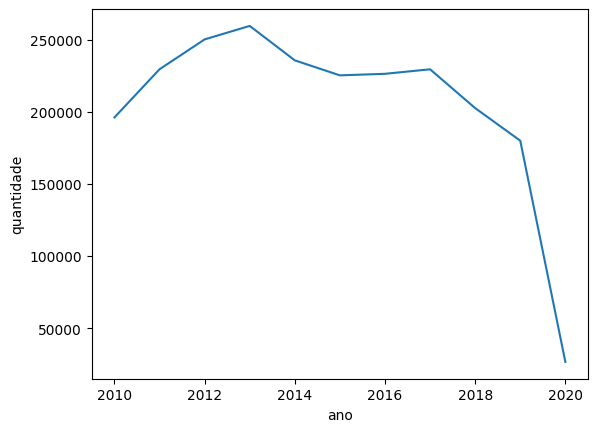

In [38]:
sns.lineplot(data = anos, y = 'quantidade', x = 'ano')

Existe um decrescimo de empréstimos mesmo antes do período da pandemia

#### Quantos emprestimos foram feitos por mês ?

In [39]:
emprestimo_mes = emprestimo_exemplares['data_emprestimo'].dt.strftime('%b').value_counts().reset_index()
emprestimo_mes.columns = ['mes', 'quantidade']
emprestimo_mes

,mes,quantidade
0,Mar,275780
1,Aug,253099
2,Apr,230339
3,Sep,227147
4,Feb,226945
5,May,223233
6,Oct,206765
7,Nov,180909
8,Jun,151948
9,Jul,130812


In [40]:
datamap = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [41]:
emprestimo_mes.index = list(map(lambda x: datamap[x], emprestimo_mes['mes']))

In [42]:
emprestimo_mes = emprestimo_mes.sort_index()

In [43]:
emprestimo_mes

,mes,quantidade
1,Jan,72212
2,Feb,226945
3,Mar,275780
4,Apr,230339
5,May,223233
6,Jun,151948
7,Jul,130812
8,Aug,253099
9,Sep,227147
10,Oct,206765


<Axes: xlabel='mes', ylabel='quantidade'>

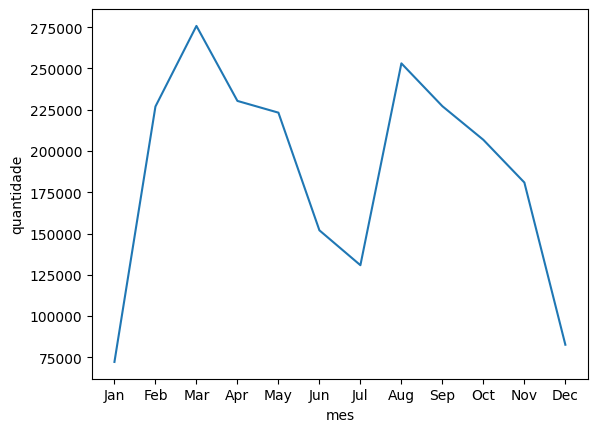

In [44]:
sns.lineplot(data = emprestimo_mes, y = 'quantidade', x = 'mes')

#### Qual é a quantidade de exemplares emprestados por hora?


In [45]:
emprestimo_exemplares['data_emprestimo'].dt.hour.value_counts()

16    226892
10    199592
17    197377
18    196678
11    189377
15    179570
14    162849
12    156142
20    153254
9     142595
13    135580
19    118964
8     112850
21     67849
7      21653
22       460
0         61
23        55
6         18
Name: data_emprestimo, dtype: int64

In [46]:
h_r = emprestimo_exemplares['data_emprestimo'].dt.hour.value_counts().reset_index()
h_r.columns = ['hora', 'quantidade']
h_r.dropna(inplace=True)
h_r['hora'] = h_r['hora'].astype(int)

<Axes: xlabel='hora', ylabel='quantidade'>

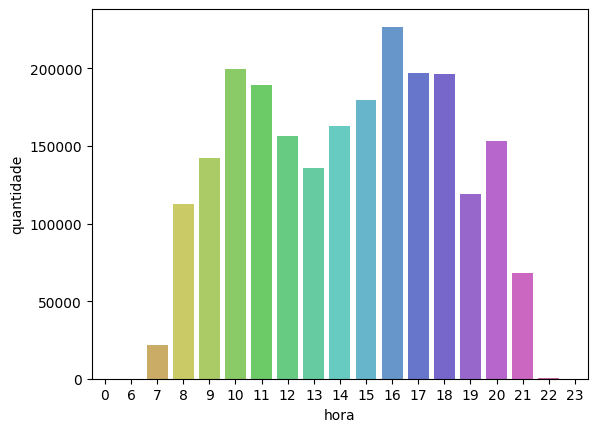

In [47]:
sns.barplot(data = h_r, y = 'quantidade', x = 'hora', palette = 'hls', linewidth = 2.5, capsize=.4)

#### Exemplares emprestados por dia da semana

In [48]:
dia = emprestimo_exemplares['data_emprestimo'].dt.strftime('%a').value_counts().reset_index()
dia.columns = ['dia', 'quantidade']
print(dia)

   dia  quantidade
0  Mon      497615
1  Tue      467369
2  Wed      445916
3  Thu      407976
4  Fri      394271
5  Sun       24902
6  Sat       23767


<Axes: xlabel='dia', ylabel='quantidade'>

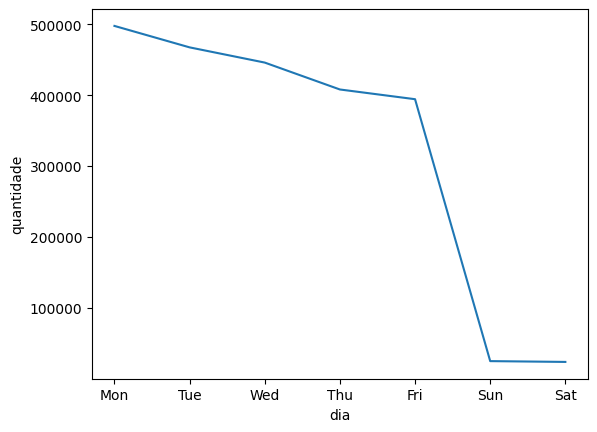

In [49]:
sns.lineplot(data = dia, y = 'quantidade', x = 'dia')

#### Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?

In [50]:
exemplares_tipo = emprestimo_exemplares['tipo_vinculo_usuario'].value_counts(normalize=True).reset_index()
exemplares_tipo.columns = ['tipo', 'percentual']
exemplares_tipo['percentual'] = exemplares_tipo['percentual']*100
exemplares_tipo

,tipo,percentual
0,ALUNO DE GRADUAÇÃO,78.341032
1,ALUNO DE PÓS-GRADUAÇÃO,14.151505
2,DOCENTE,3.461157
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,1.511087
4,ALUNO MÉDIO/TÉCNICO,1.325882
5,DOCENTE EXTERNO,1.087887
6,USUÁRIO EXTERNO,0.121186
7,OUTROS,0.000265


#### Quais coleções são mais emprestadas?

In [51]:
colecao = emprestimo_exemplares['colecao'].value_counts(normalize=True).reset_index()
colecao.columns = ['colecao', 'percentual']
colecao['percentual'] = colecao['percentual']*100
colecao.drop(1, inplace=True)
colecao

,colecao,percentual
0,Acervo Circulante,90.774670
2,Multimeios,0.351664
3,Monografias,0.177778
4,Dissertações,0.106375
5,Obras de Referência,0.086391
6,Publicações de Autores do RN,0.038288
7,Publicações da UFRN,0.033778
8,Teses,0.031568
9,Folhetos,0.011982
10,Necessidades Educacionais Específicas,0.005748


#### De quais temas da CDU são os exemplares emprestados?

In [52]:
emprestimo_exemplares['CDU'].value_counts(normalize=True)

Ciências aplicadas                 0.630244
Ciências sociais                   0.163383
Generalidades                      0.111319
Matemática e ciências naturais     0.030394
Religião                           0.027542
Filosofia e psicologia             0.026777
Geografia. Biografia. História.    0.003532
Belas artes                        0.003498
Linguagem                          0.003311
Name: CDU, dtype: float64

In [53]:
temas = emprestimo_exemplares['CDU'].value_counts(normalize=True).reset_index()
temas.columns = ['CDU', 'percentual']
temas['percentual'] = temas['percentual']*100

<Axes: xlabel='percentual', ylabel='CDU'>

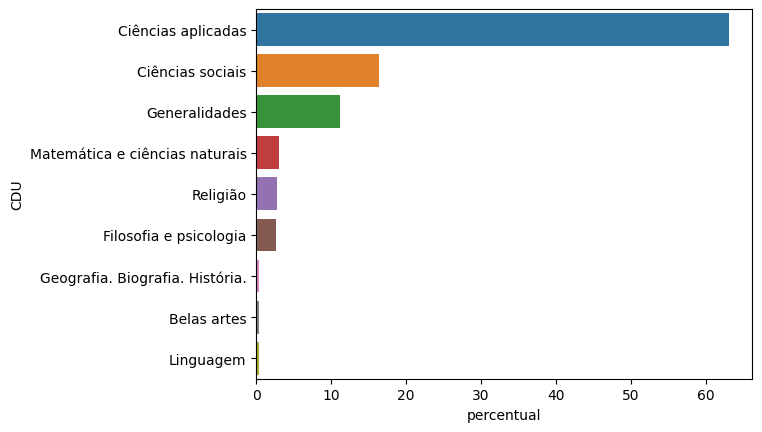

In [54]:
sns.barplot(data = temas, x = 'percentual', y = 'CDU')

#### Quais são as bibliotecas com mais ou menos quantidade de empréstimos?

In [55]:
bibliotecas = emprestimo_exemplares['biblioteca'].value_counts(normalize=True).reset_index()
bibliotecas.columns = ['biblioteca', 'percentual']
bibliotecas['percentual'] = bibliotecas['percentual']*100
bibliotecas.drop(1, inplace=True)
bibliotecas

,biblioteca,percentual
0,Biblioteca Central Zila Mamede,63.053228
2,Biblioteca Setorial do Centro Ciências da Saúd...,5.244282
3,Biblioteca Setorial da Faculdade de Ciências d...,3.431269
4,Biblioteca Setorial Prof. Alberto Moreira Camp...,2.937993
5,Biblioteca Setorial Profª. Maria Lúcia da Cost...,2.718081
6,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,2.035533
7,Biblioteca Setorial do Centro de Ciências Huma...,1.801473
8,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,1.419081
9,Biblioteca Setorial Profª. Maria José Mamede G...,1.286090
10,Biblioteca Setorial Prof. Rodolfo Helinski - E...,1.203458


#### Exemplares x Alunos graduação

In [56]:
tipo_ano = emprestimo_exemplares.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
tipo2 = {}
tipo2['ano'] = tipo_ano['data_emprestimo'].dt.year
tipo2['mes'] = tipo_ano['data_emprestimo'].dt.month
tipo2 = pd.DataFrame(tipo2)

In [57]:
tipo3 = tipo2[['ano', 'mes']].value_counts().to_frame('quantidade').reset_index()
tipo3.columns = ['ano','mes', 'quantidade']


(0.0, 29103.800000000003)

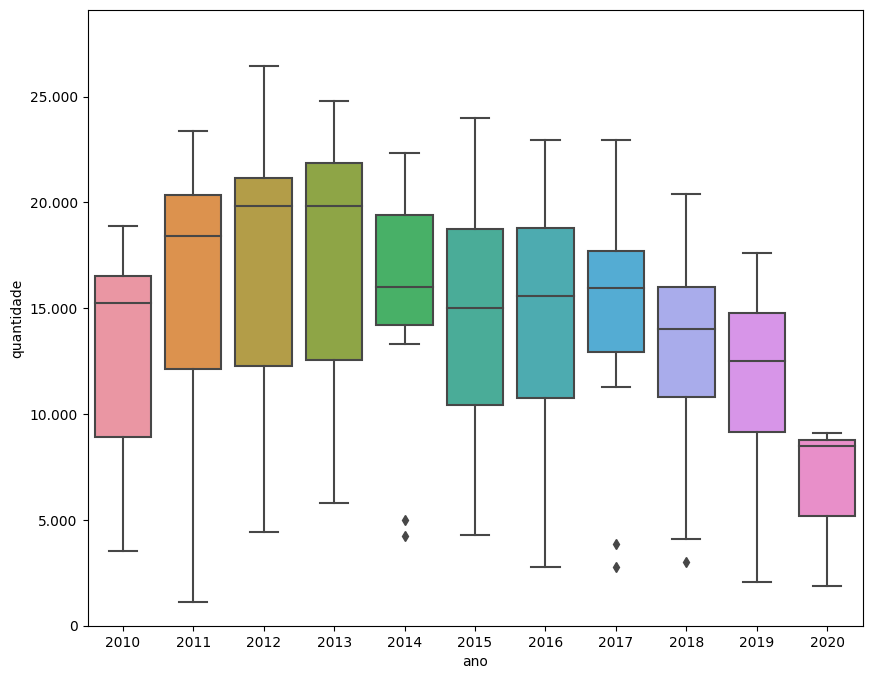

In [58]:
from matplotlib import ticker
plt.figure(figsize=(10,8))
ax = sns.boxplot(y= 'quantidade', x= 'ano', data= tipo3)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
plt.ylim(0,max(tipo3['quantidade'])*1.1)

#### Exemplares x Alunos pós-graduação

In [59]:
pos = emprestimo_exemplares.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
pos_datas = {}
pos_datas = pd.DataFrame(pos_datas)
pos_datas['ano'] = pos['data_emprestimo'].dt.year
pos_datas['mes'] = pos['data_emprestimo'].dt.month
pos_datas.columns = ['ano','mes']
pos_datas = pos_datas[['ano', 'mes']].value_counts().to_frame('quantidade').reset_index()
pos_datas.columns = ['ano','mes', 'quantidade']

In [60]:
pos_datas

,ano,mes,quantidade
0,2015,3,4154
1,2017,8,4045
2,2012,3,3930
3,2016,3,3916
4,2017,3,3916
...,...,...,...
119,2020,2,1245
120,2020,1,1184
121,2019,12,1108
122,2011,1,511


(0.0, 29103.800000000003)

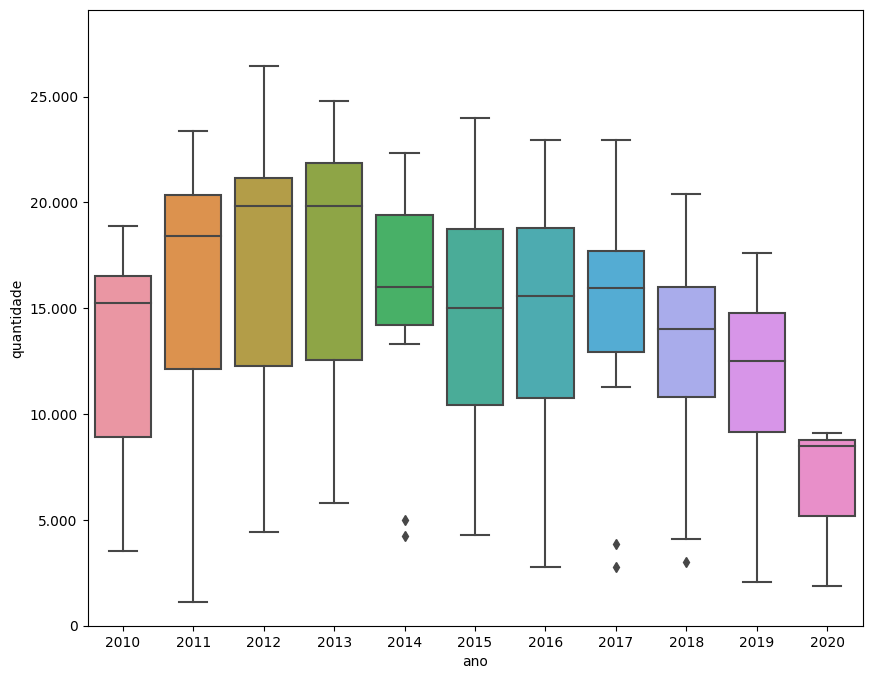

In [61]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y= 'quantidade', x= 'ano', data= tipo3)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
plt.ylim(0,max(tipo3['quantidade'])*1.1)

#### Calcular a quantidade de empréstimos realizados entre 2015 e 2020 por cada curso de graduação que passará pela avaliação

Os cursos serão:


Biblioteconomia;
Ciências sociais;
Comunicação social;
Direito;
Filosofia;
Pedagogia;

In [62]:
pd.set_option('float_format','{:.2f}'.format)

In [63]:
matricula_alunos.head()

,Unnamed: 0,Número da matrícula,Tipo de vinculo,Curso
0,0,190001688.00,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1,199014489.00,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,2,199735674.00,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,3,199812431.00,ALUNO DE GRADUAÇÃO,LETRAS
4,4,199823670.00,ALUNO DE GRADUAÇÃO,ECOLOGIA


In [64]:
matricula_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7726 entries, 0 to 7725
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7726 non-null   int64  
 1   Número da matrícula  7726 non-null   float64
 2   Tipo de vinculo      7726 non-null   object 
 3   Curso                7726 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 241.6+ KB


In [65]:
matricula_alunos.drop(columns = 'Unnamed: 0', inplace = True)

In [66]:
matricula_alunos.rename(columns={'Número da matrícula':'matricula_ou_siape'}, inplace=True)

In [67]:
matricula_alunos.rename(columns={'Curso':'curso'}, inplace=True)

In [68]:
matricula_alunos.rename(columns={'Tipo de vinculo':'tipo_vinculo_usuario'}, inplace=True)

In [69]:
usuarios.drop(columns = 'Unnamed: 0', inplace = True)

In [70]:
usuarios.matricula_ou_siape = usuarios.matricula_ou_siape.astype(float)

In [71]:
cursos = pd.concat([matricula_alunos, usuarios], ignore_index= True)

In [72]:
emprestimo_exemplares['matricula_ou_siape'] = emprestimo_exemplares['matricula_ou_siape'].astype(float)

In [73]:
df = cursos.merge(emprestimo_exemplares)
df.head()

,matricula_ou_siape,tipo_vinculo_usuario,curso,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,190001688.00,ALUNO DE GRADUAÇÃO,MATEMÁTICA,756748,L178105,2010-04-28 18:40:03.475,2010-04-14 19:23:20.606,2010-05-17 16:39:31.802,137919.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,623.0,Ciências aplicadas
1,190001688.00,ALUNO DE GRADUAÇÃO,MATEMÁTICA,756749,2006014146,2010-04-28 18:40:03.461,2010-04-14 19:23:20.635,2010-05-17 16:39:36.773,nan,0,0,0,-1.0,Generalidades
2,199014489.00,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS,738709,L174091,NaT,2010-03-18 14:38:05.542,2010-03-30 16:48:10.635,82849.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,606.0,Ciências aplicadas
3,199735674.00,ALUNO DE GRADUAÇÃO,MATEMÁTICA,710643,L130137,NaT,2010-01-08 18:35:02.046,2010-01-25 18:27:22.739,34943.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,680.0,Ciências aplicadas
4,199735674.00,ALUNO DE GRADUAÇÃO,MATEMÁTICA,710644,L159282,NaT,2010-01-08 18:35:02.093,2010-01-25 18:27:29.119,59134.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,620.0,Ciências aplicadas


In [74]:
df['curso'] = df['curso'].astype(str)
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype(str)

In [75]:
maio_igual_2015 = df.query('data_emprestimo.dt.year >= 2015')

In [76]:
biblioteconomia = maio_igual_2015.query('curso == "BIBLIOTECONOMIA"')
ciencias_sociais  = maio_igual_2015.query('curso == "CIÊNCIAS SOCIAIS"')
comuncacao_social = maio_igual_2015.query('curso == "COMUNICAÇÃO SOCIAL"')
direito = maio_igual_2015.query('curso == "DIREITO"')
filosofia = maio_igual_2015.query('curso == "FILOSOFIA"')
pedagogia = maio_igual_2015.query('curso == "PEDAGOGIA"')

In [77]:
curso = {}

In [78]:
biblioteconomia_emprestimo = biblioteconomia['data_emprestimo'].dt.year.value_counts().reset_index()
biblioteconomia_emprestimo.columns = ['ano','total']
biblioteconomia_emprestimo = biblioteconomia_emprestimo.groupby('ano').sum()
biblioteconomia_emprestimo['curso'] = 'Biblioteconomia'
biblioteconomia_emprestimo

,total,curso
ano,,
2015,7989,Biblioteconomia
2016,7319,Biblioteconomia
2017,7661,Biblioteconomia
2018,6661,Biblioteconomia
2019,6264,Biblioteconomia
2020,945,Biblioteconomia


In [79]:
ciencias_sociais_emprestimo = ciencias_sociais['data_emprestimo'].dt.year.value_counts().reset_index()
ciencias_sociais_emprestimo.columns = ['ano','total']
ciencias_sociais_emprestimo = ciencias_sociais_emprestimo.groupby('ano').sum()
ciencias_sociais_emprestimo['curso'] = 'Ciências Sociais'

In [80]:
comuncacao_social_emprestimo = comuncacao_social['data_emprestimo'].dt.year.value_counts().reset_index()
comuncacao_social_emprestimo.columns = ['ano','total']
comuncacao_social_emprestimo = comuncacao_social_emprestimo.groupby('ano').sum()
comuncacao_social_emprestimo['curso'] = 'Comunicação Social'

In [81]:
direito_emprestimo = direito['data_emprestimo'].dt.year.value_counts().reset_index()
direito_emprestimo.columns = ['ano','total']
direito_emprestimo = direito_emprestimo.groupby('ano').sum()
direito_emprestimo['curso'] = 'Direito'

In [82]:
filosofia_emprestimo = filosofia['data_emprestimo'].dt.year.value_counts().reset_index()
filosofia_emprestimo.columns = ['ano','total']
filosofia_emprestimo = filosofia_emprestimo.groupby('ano').sum()
filosofia_emprestimo ['curso'] = 'Filosofia'

In [83]:
pedagogia_emprestimo = pedagogia['data_emprestimo'].dt.year.value_counts().reset_index()
pedagogia_emprestimo.columns = ['ano','total']
pedagogia_emprestimo = pedagogia_emprestimo.groupby('ano').sum()
pedagogia_emprestimo['curso'] = 'Pedagogia'

In [142]:
curso = pd.concat([ biblioteconomia_emprestimo, ciencias_sociais_emprestimo, comuncacao_social_emprestimo, direito_emprestimo, filosofia_emprestimo, pedagogia_emprestimo])

In [143]:
curso = pd.DataFrame(curso)
curso_pivot = curso.pivot_table('curso', index=['curso', 'ano', 'total'])
curso_pivot

Empty DataFrame
Columns: []
Index: [(Biblioteconomia, 2015, 7989), (Biblioteconomia, 2016, 7319), (Biblioteconomia, 2017, 7661), (Biblioteconomia, 2018, 6661), (Biblioteconomia, 2019, 6264), (Biblioteconomia, 2020, 945), (Ciências Sociais, 2015, 7783), (Ciências Sociais, 2016, 7295), (Ciências Sociais, 2017, 7269), (Ciências Sociais, 2018, 6472), (Ciências Sociais, 2019, 6061), (Ciências Sociais, 2020, 860), (Comunicação Social, 2015, 7548), (Comunicação Social, 2016, 8488), (Comunicação Social, 2017, 8761), (Comunicação Social, 2018, 7336), (Comunicação Social, 2019, 6210), (Comunicação Social, 2020, 836), (Direito, 2015, 7866), (Direito, 2016, 7599), (Direito, 2017, 8171), (Direito, 2018, 7249), (Direito, 2019, 6119), (Direito, 2020, 937), (Filosofia, 2015, 7362), (Filosofia, 2016, 7951), (Filosofia, 2017, 7776), (Filosofia, 2018, 6623), (Filosofia, 2019, 5872), (Filosofia, 2020, 865), (Pedagogia, 2015, 7579), (Pedagogia, 2016, 7545), (Pedagogia, 2017, 7888), (Pedagogia, 2018, 6809), (Pedagogia, 2019, 6186), (Pedagogia, 2020, 916)]

#### diferença percentual de empréstimos realizados nos últimos anos (2017, 2018, 2019) para cada curso

In [177]:
df['ano'] = df.data_emprestimo.dt.year

In [178]:
maio_igual_2017 = df.query('ano >= 2017')

In [179]:
df2 = maio_igual_2017.iloc[:,[2,14]].value_counts().reset_index()
df2.columns = ['CURSO', 'ANO', 'QUANTIDADE']
df2.head()

,CURSO,ANO,QUANTIDADE
0,COMUNICAÇÃO SOCIAL,2017,8761
1,CIÊNCIAS ATUARIAIS,2017,8560
2,ARQUITETURA E URBANISMO,2017,8451
3,ENGENHARIA CIVIL,2017,8427
4,CIÊNCIAS E TECNOLOGIA,2017,8393


In [180]:
df2 = pd.DataFrame(df2)
df2_pivot = df2.pivot_table(index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE')
df2_pivot

ANO,2017,2018,2019,2020
CURSO,,,,
ADMINISTRAÇÃO,7768.00,6527.00,5868.00,822.00
AGRONOMIA,7834.00,7120.00,5880.00,867.00
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,16.00,11.00,NaN,NaN
ARQUITETURA E URBANISMO,8451.00,7188.00,6247.00,836.00
BIBLIOTECONOMIA,7661.00,6661.00,6264.00,945.00
BIOMEDICINA,7588.00,6549.00,5665.00,841.00
CIÊNCIA DA COMPUTAÇÃO,7345.00,6607.00,5733.00,831.00
CIÊNCIAS ATUARIAIS,8560.00,7588.00,6666.00,960.00
CIÊNCIAS BIOLÓGICAS,7703.00,6841.00,5622.00,865.00


In [181]:
previsao_2022 = pd.read_table('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_7-Apresentando_resultados_em_HTML/Dataset/previsao')
previsao_2022 = previsao_2022['curso previsao_2022'].str.split(' ', expand = True)
previsao_2022.columns = ['CURSO', 'QUANTIDADE']
previsao_2022['CURSO'] = previsao_2022['CURSO'].str.upper().str.replace('_', ' ')

In [187]:
previsao_2022['QUANTIDADE'] = previsao_2022['QUANTIDADE'].astype(int)
previsao_2022['ANO'] = 2022
previsao_2022['CURSO'] = previsao_2022['CURSO'].str.replace('ADMINISTRACAO', 'ADMINISTRAÇÃO')
previsao_2022['CURSO'] = previsao_2022['CURSO'].str.replace('CIENCIA', 'CIÊNCIA')
previsao_2022

,CURSO,QUANTIDADE,ANO
0,ADMINISTRAÇÃO,1905,2022
1,ARQUITETURA E URBANISMO,1896,2022
2,ARTES CENICAS,1920,2022
3,BIOINFORMATICA,2302,2022
4,BIOQUIMICA,2090,2022
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,2010,2022
6,CIÊNCIA TECNOLOGIA E INOVACAO,1960,2022
7,CIÊNCIAS DA SAUDE,1730,2022
8,CIÊNCIAS ODONTOLOGICAS,2405,2022
9,DESIGN,1900,2022


In [192]:
df2['CURSO'] = df2['CURSO'].str.replace('CIÊNCIAS E TECNOLOGIA', 'CIÊNCIA TECNOLOGIA E INOVACAO')

In [193]:
frames = [df2, previsao_2022]
result = pd.concat(frames)
result

,CURSO,ANO,QUANTIDADE
0,COMUNICAÇÃO SOCIAL,2017,8761
1,CIÊNCIAS ATUARIAIS,2017,8560
2,ARQUITETURA E URBANISMO,2017,8451
3,ENGENHARIA CIVIL,2017,8427
4,CIÊNCIA TECNOLOGIA E INOVACAO,2017,8393
...,...,...,...
9,DESIGN,2022,1900
10,ENGENHARIA CIVIL,2022,1920
11,ENGENHARIA SOFTWARE,2022,1890
12,FILOSOFIA,2022,1903


In [218]:
result.fillna(0, inplace=True)

In [219]:
result = pd.DataFrame(result)
result_pivot = result.pivot_table(index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE', fill_value = 0)
result_pivot

ANO,2017,2018,2019,2020,2022
CURSO,,,,,
ADMINISTRAÇÃO,7768,6527,5868,822,1905
AGRONOMIA,7834,7120,5880,867,0
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,16,11,0,0,0
ARQUITETURA E URBANISMO,8451,7188,6247,836,1896
ARTES CENICAS,0,0,0,0,1920
BIBLIOTECONOMIA,7661,6661,6264,945,0
BIOINFORMATICA,0,0,0,0,2302
BIOMEDICINA,7588,6549,5665,841,0
BIOQUIMICA,0,0,0,0,2090


In [220]:
result_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, ADMINISTRAÇÃO to TURISMO
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2017    41 non-null     int64
 1   2018    41 non-null     int64
 2   2019    41 non-null     int64
 3   2020    41 non-null     int64
 4   2022    41 non-null     int64
dtypes: int64(5)
memory usage: 1.9+ KB


In [245]:
def diferença(atual, anterior):
  dif = ((atual-anterior)/anterior)*100
  dif = round(dif,2)
  return dif

In [246]:
d2017_2018 = diferença(result_pivot.iloc[:,1], result_pivot.iloc[:,0])
d2017_2018

CURSO
ADMINISTRAÇÃO                             -15.98
AGRONOMIA                                  -9.11
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS     -31.25
ARQUITETURA E URBANISMO                   -14.94
ARTES CENICAS                                NaN
BIBLIOTECONOMIA                           -13.05
BIOINFORMATICA                               NaN
BIOMEDICINA                               -13.69
BIOQUIMICA                                   NaN
CIÊNCIA DA COMPUTAÇÃO                     -10.05
CIÊNCIA E ENGENHARIA DE MATERIAIS            NaN
CIÊNCIA TECNOLOGIA E INOVACAO             -13.61
CIÊNCIAS ATUARIAIS                        -11.36
CIÊNCIAS BIOLÓGICAS                       -11.19
CIÊNCIAS DA SAUDE                            NaN
CIÊNCIAS ODONTOLOGICAS                       NaN
CIÊNCIAS SOCIAIS                          -10.96
COMUNICAÇÃO SOCIAL                        -16.27
DANÇA                                      -8.04
DESIGN                                       NaN
DIREITO       

In [247]:
d2018_2019 = diferença(result_pivot.iloc[:,2], result_pivot.iloc[:,1])
d2019_2022 = diferença(result_pivot.iloc[:,4], result_pivot.iloc[:,2])

In [248]:
result_dif = {'2018': d2017_2018, '2019': d2018_2019, '2022': d2019_2022}
result_dif = pd.DataFrame(result_dif)
result_dif.fillna(0, inplace= True)

In [250]:
result_dif

,2018,2019,2022
CURSO,,,
ADMINISTRAÇÃO,-15.98,-10.10,-67.54
AGRONOMIA,-9.11,-17.42,-100.00
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,-31.25,-100.00,0.00
ARQUITETURA E URBANISMO,-14.94,-13.09,-69.65
ARTES CENICAS,0.00,0.00,inf
BIBLIOTECONOMIA,-13.05,-5.96,-100.00
BIOINFORMATICA,0.00,0.00,inf
BIOMEDICINA,-13.69,-13.50,-100.00
BIOQUIMICA,0.00,0.00,inf


#### exportando para HTML

In [267]:
r_dif = result_dif.to_html()